In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import sys,os
from sample_group import tf_sample_group

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
points_2d = np.load('a_points_2d.npy')
point_cloud = np.array([points_2d])
print (np.shape(point_cloud))
pc = tf.placeholder(tf.float32, [1, None, 3], 'inputs_part')
#core_id_all, core_pts_all = farthest_point_sample_all(3, pc)
core_id, core_pts = tf_sample_group.farthest_point_sample(pc, 16, radius=0.2, min_point=6)
cores, radius, local, cnt = tf_sample_group.sample_group(pc, 16, radius=0.2, min_point=6)
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)
sess.run(tf.global_variables_initializer())

(1, 938, 3)


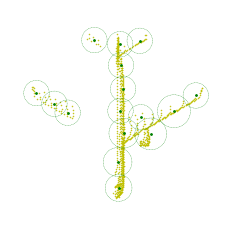

In [3]:
output1,output2,output3,output4,output5,output6 = sess.run([core_id, core_pts, cores, radius, local, cnt], 
                                                           feed_dict={pc:point_cloud})
import matplotlib.pyplot as plt
%matplotlib inline
def draw_circle(center,r,plt):
    theta = np.arange(0, 2*np.pi, 0.01)
    x = center[0]+r*np.cos(theta)
    y = center[1]+r*np.sin(theta)
    plt.plot(x,y, color='green',linewidth=0.3,linestyle="--")
    plt.scatter(center[0], center[1], s=3, marker='o', c='green')
    
plt.axis('scaled')
plt.xlim(-1.29,1.29)
plt.ylim(-1.28,1.28)
plt.xticks(())
plt.yticks(())    

#plt.xticks(())
#plt.yticks(())
plt.scatter(points_2d[:,0], points_2d[:,1], s=1, marker='.', c='y')

for i in range (16):
    draw_circle(output3[0,i],output4[0,i],plt)

plt.axis('off')
plt.show()

In [4]:
import time
t0 = time.time()
output5,output6 = sess.run([local, cnt],feed_dict={pc:point_cloud})
print ("Time: %s s."%(time.time()-t0))

Time: 0.0022056102752685547 s.


In [5]:
from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()
gpu_name = [x for x in local_device_protos if x.device_type == 'GPU']
print (gpu_name)

[name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15370281280
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12210021035014116280
physical_device_desc: "device: 0, name: GeForce RTX 3080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]
